# Introducción a las ciencias de la computación *y programación en Python*

*Banco de Guatemala*  
*PES 2025-2026*  
*Programación I*  
*Septiembre de 2025*  

# pandas

**Learning Objectives:**
  * Gain an introduction to the `DataFrame` and `Series` data structures of the *pandas* library
  * Access and manipulate data within a `DataFrame` and `Series`
  * Import CSV data into a *pandas* `DataFrame`
  * Reindex a `DataFrame` to shuffle data

[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data, and many ML frameworks support *pandas* data structures as inputs.
Although a comprehensive introduction to the *pandas* API would span many pages, the core concepts are fairly straightforward, and we'll present them below. For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

# pandas: data analysis in Python

For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library has become essential.

What is `pandas`?

* Pandas can be thought of as *NumPy arrays with labels* for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
* Pandas can also be thought of as `R`'s `data.frame` in Python.
* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

It's documentation: http://pandas.pydata.org/pandas-docs/stable/


### When do you need pandas? **

When working with **tabular or structured data** (like R dataframe, SQL table, Excel spreadsheet, ...):

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with scikit-learn, statsmodels, ...)

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br>

Pandas is great for working with heterogeneous and tabular 1D/2D data, but not all types of data fit in such structures!
<ul>
<li>When working with array data (e.g. images, numerical algorithms): just stick with numpy</li>
<li>When working with multidimensional labeled data (e.g. climate data): have a look at [xarray](http://xarray.pydata.org/en/stable/)</li>
</ul>
</div>

# Basic Concepts

The following line imports the *pandas* API and prints the API version:

In [6]:
import pandas as pd

In [7]:
pd.__version__

'2.3.2'

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html).

# The pandas data structures: `DataFrame` and `Series`

A `DataFrame` is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.




## Create `Series` and `DataFrame` from scratch

One way to create a `Series` is to construct a `Series` object. For example:

In [8]:
s = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
s

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [10]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

# Diccionario con llaves como títulos de las columnas
df = pd.DataFrame({ 'City name': city_names, 'Population': population })
df

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


## Load data from CSV file

In [13]:
df = pd.read_csv("data/titanic.csv")

In [14]:
# Nos da el inicio de la tabla, hasta x registros
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ¿What can you do with pandas?

Starting from reading this dataset, to answering questions about this data in a few lines of code:

In [17]:
# Accede a la columna "Age", devuelve un objeto 'Series'
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

**What is the age distribution of the passengers?**

In [ ]:
df
df["Age"]
df["Age"].mean()

np.float64(29.69911764705882)

<Axes: >

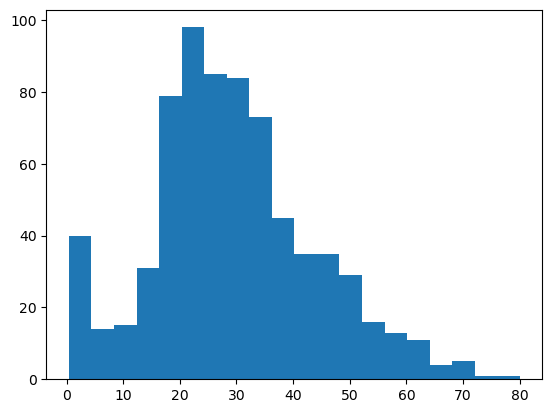

In [21]:
df['Age'].hist(bins=20, grid=False)

**How does the survival rate of the passengers differ between sexes?**

In [33]:
df.groupby('Sex')[['Survived']].aggregate('mean')

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
(df                                             # DataFrame original
    .groupby('Sex')[['Survived']]               # Se agrupa por columna 'Sex'
    .aggregate(lambda x: x.sum() / len(x)))     # Se calcula la media de cada columna

,Survived
Sex,
female,0.742038
male,0.188908


**Or how does it differ between the different classes?**

In [49]:
(df
    .groupby(['Pclass', 'Sex'])['Survived']
    .aggregate('mean'))
    #.plot(kind='bar')

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [46]:
(df
    .groupby(['Pclass', 'Sex'])[['Survived']]
    .aggregate('mean'))
    #.plot(kind='bar')

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

***

# Attributes of a `Series`: `index` and `values`

The Series has an `index` and `values` attribute, but no `columns`

In [51]:
age = df['Age']
type(age)

pandas.core.series.Series

In [60]:
age.index

RangeIndex(start=0, stop=891, step=1)

You can access the underlying numpy array representation with the `.values` attribute:

In [61]:
# Atributo values
type(age.values[:10])

numpy.ndarray

In [62]:
# Atributo values
(age.values[:10])

array([22., 38., 26., 35., 35., nan, 54.,  2., 27., 14.])

We can access series values via the index, just like for NumPy arrays:

In [64]:
age[0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

Unlike the NumPy array, though, this index can be something other than integers:

In [65]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [66]:
df2 = df.set_index('Name')
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
age = df2['Age']
age

Name
Braund, Mr. Owen Harris                                22.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38.0
Heikkinen, Miss. Laina                                 26.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35.0
Allen, Mr. William Henry                               35.0
                                                       ... 
Montvila, Rev. Juozas                                  27.0
Graham, Miss. Margaret Edith                           19.0
Johnston, Miss. Catherine Helen "Carrie"                NaN
Behr, Mr. Karl Howell                                  26.0
Dooley, Mr. Patrick                                    32.0
Name: Age, Length: 891, dtype: float64

In [72]:
age['Dooley, Mr. Patrick']

np.float64(32.0)

but with the power of numpy arrays. Many things you can do with numpy arrays, can also be applied on DataFrames / Series.

Eg element-wise operations:

In [ ]:
age * 1000 + age

Name
Braund, Mr. Owen Harris                                22022.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38038.0
Heikkinen, Miss. Laina                                 26026.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35035.0
Allen, Mr. William Henry                               35035.0
                                                        ...   
Montvila, Rev. Juozas                                  27027.0
Graham, Miss. Margaret Edith                           19019.0
Johnston, Miss. Catherine Helen "Carrie"                   NaN
Behr, Mr. Karl Howell                                  26026.0
Dooley, Mr. Patrick                                    32032.0
Name: Age, Length: 891, dtype: float64

A range of methods:

In [76]:
age.mean()

np.float64(29.69911764705882)

Fancy indexing, like indexing with a list or boolean indexing:

In [79]:
age > 70
age[age > 70]

Name
Goldschmidt, Mr. George B               71.0
Connors, Mr. Patrick                    70.5
Artagaveytia, Mr. Ramon                 71.0
Barkworth, Mr. Algernon Henry Wilson    80.0
Svensson, Mr. Johan                     74.0
Name: Age, dtype: float64

But also a lot of pandas specific methods, e.g.

In [81]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

***

# Attributes of the `DataFrame`

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [84]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [92]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

To check the data types of the different columns:

In [91]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

An overview of that information can be given with the `info()` method:

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Also a DataFrame has a `values` attribute, but attention: when you have heterogeneous data, all values will be **upcasted**:

In [90]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], shape=(891, 12), dtype=object)

***

## Load CSV from URL

But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

In [96]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The example above used `DataFrame.describe` to show interesting statistics about a `DataFrame`. Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

In [95]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

In [98]:
california_housing_dataframe.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'latitude'}>]], dtype=object)

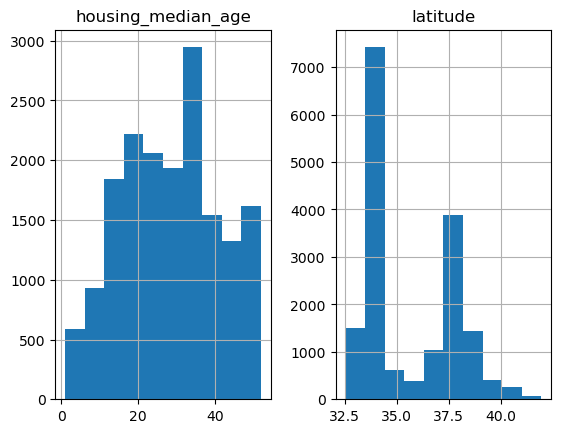

In [99]:
california_housing_dataframe.hist(['housing_median_age', 'latitude'])

## Accessing Data

You can access `DataFrame` data using familiar Python dict/list operations:

In [120]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities

<class 'pandas.core.series.Series'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [110]:
cities['Population'][0]

np.int64(852469)

In [144]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


In addition, *pandas* provides an extremely rich API for advanced [indexing and selection](http://pandas.pydata.org/pandas-docs/stable/indexing.html) that is too extensive to be covered here.

## Manipulating Data

You may apply Python's basic arithmetic operations to `Series`. For example:

In [111]:
population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

[NumPy](http://www.numpy.org/) is a popular toolkit for scientific computing. *pandas* `Series` can be used as arguments to most NumPy functions:

In [112]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

For more complex single-column transformations, you can use `Series.apply`. Like the Python [map function](https://docs.python.org/2/library/functions.html#map), 
`Series.apply` accepts as an argument a [lambda function](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), which is applied to each value.

The example below creates a new `Series` that indicates whether `population` is over one million:

In [113]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

In [116]:
population.apply(lambda x: 2*x)

0    1704938
1    2031570
2     970398
dtype: int64


Modifying `DataFrames` is also straightforward. For example, the following code adds two `Series` to an existing `DataFrame`:

In [125]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities

<class 'pandas.core.series.Series'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [127]:
# Agregamos dos columnas
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities['More100000'] = population.apply(lambda x: x > 100000)
cities

,City name,Population,Area square miles,Population density,More100000
0,San Francisco,852469,46.87,18187.945381,True
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,True


# Selecting and filtering data

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. <br><br> We now have to distuinguish between:

 <ul>
  <li>selection by **label**</li>
  <li>selection by **position**</li>
</ul>
</div>

In [129]:
df = pd.read_csv("data/titanic.csv")

### `df[]` provides some convenience shortcuts 

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [130]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

or multiple columns:

In [131]:
df[['Age', 'Fare']]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


But, slicing accesses the rows:

In [132]:
df[10:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


## Systematic indexing with `loc` and `iloc`

When using `[]` like above, you can only select from one axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [136]:
df = pd.read_csv("data/titanic.csv")
df = df.set_index('Name')

In [137]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [138]:
df.loc['Bonnell, Miss. Elizabeth', 'Fare']

np.float64(26.55)

In [139]:
'Bonnell, Miss. Elizabeth':'Andersson, Mr. Anders Johan'

SyntaxError: illegal target for annotation (79661812.py, line 1)

In [143]:
df.loc['Bonnell, Miss. Elizabeth':'Andersson, Mr. Anders Johan', :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Bonnell, Miss. Elizabeth",12,1,1,female,58.0,0,0,113783,26.550,C103,S
"Saundercock, Mr. William Henry",13,0,3,male,20.0,0,0,A/5. 2151,8.050,NaN,S
"Andersson, Mr. Anders Johan",14,0,3,male,39.0,1,5,347082,31.275,NaN,S


Selecting by position with `iloc` works similar as indexing numpy arrays:

In [141]:
df.iloc[0:2,1:3]

,Survived,Pclass
Name,,
"Braund, Mr. Owen Harris",0,3
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1


The different indexing methods can also be used to assign data:

In [157]:
df.loc['Braund, Mr. Owen Harris', 'Survived'] = 100

In [158]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,100,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Boolean indexing (filtering)

Often, you want to select rows based on a certain condition. This can be done with 'boolean indexing' (like a where clause in SQL) and comparable to numpy. 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed.

In [146]:
(df['Fare'] > 50).mean()

np.float64(0.17957351290684623)

In [149]:
df['Fare'] > 50

Name
Braund, Mr. Owen Harris                                False
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     True
Heikkinen, Miss. Laina                                 False
Futrelle, Mrs. Jacques Heath (Lily May Peel)            True
Allen, Mr. William Henry                               False
                                                       ...  
Montvila, Rev. Juozas                                  False
Graham, Miss. Margaret Edith                           False
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                  False
Dooley, Mr. Patrick                                    False
Name: Fare, Length: 891, dtype: bool

In [150]:
df[df['Fare'] > 50]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Fortune, Mr. Charles Alexander",28,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S
"Spencer, Mrs. William Augustus (Marie Eugenie)",32,1,1,female,NaN,1,0,PC 17569,146.5208,B78,C
...,...,...,...,...,...,...,...,...,...,...,...
"Wick, Mrs. George Dennick (Mary Hitchcock)",857,1,1,female,45.0,1,1,36928,164.8667,NaN,S
"Sage, Miss. Dorothy Edith ""Dolly""",864,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S
"Roebling, Mr. Washington Augustus II",868,0,1,male,31.0,0,0,PC 17590,50.4958,A24,S


# The group-by operation

In [155]:
df = pd.read_csv("data/titanic.csv")

### Groupby: applying functions per group

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

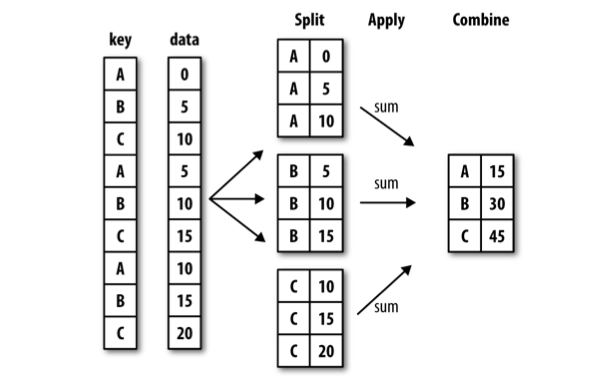

Similar to SQL `GROUP BY`

Instead of doing the manual filtering as above


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas provides the `groupby` method to do exactly this:

In [156]:
df.groupby('Pclass').sum()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,99705,136,"Cumings, Mrs. John Bradley (Florence Briggs Th...",femalefemalemalefemalemalemalemalefemalemalema...,7111.42,90,77,PC 175991138031746311378311378819950PC 17601PC...,18177.4125,C85C123E46C103A6C23 C25 C27B78D33B30C52B28C83C...,CSSSSSCCCSCCSSCSSSCCSSCSSSCSCSSSCCSSCCCCCSSQSS...
2,82056,87,"Nasser, Mrs. Nicholas (Adele Achem)Hewlett, Mr...",femalefemalemalemalemalemalefemalefemalefemale...,5168.83,74,70,237736248706244373239865248698C.A. 2457911668S...,3801.8417,D56F33E101F2F4F2DE101DF2F33DF33F4E101E77,CSSSSSSCSSSSSSSSSSSSCSSSCSSSSSSSCSSSSSSSSSSSSS...
3,215625,119,"Braund, Mr. Owen HarrisHeikkinen, Miss. LainaA...",malefemalemalemalemalefemalefemalemalemalefema...,8924.92,302,193,A/5 21171STON/O2. 3101282373450330877349909347...,6714.6951,G6F G73F E69G6G6G6E10F G63F G73E121F38E121,SSSQSSSSSSQSCQSSCQSQCSSCSCQSQQCSSSCSCSCSSSSCSS...


In [157]:
df.groupby('Pclass').aggregate(np.sum)  # 'sum'

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22680\1759962046.py:1: FutureWarning: The provided callable <function sum at 0x000001EC60AC60C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby('Pclass').aggregate(np.sum)  # 'sum'


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,99705,136,"Cumings, Mrs. John Bradley (Florence Briggs Th...",femalefemalemalefemalemalemalemalefemalemalema...,7111.42,90,77,PC 175991138031746311378311378819950PC 17601PC...,18177.4125,C85C123E46C103A6C23 C25 C27B78D33B30C52B28C83C...,CSSSSSCCCSCCSSCSSSCCSSCSSSCSCSSSCCSSCCCCCSSQSS...
2,82056,87,"Nasser, Mrs. Nicholas (Adele Achem)Hewlett, Mr...",femalefemalemalemalemalemalefemalefemalefemale...,5168.83,74,70,237736248706244373239865248698C.A. 2457911668S...,3801.8417,D56F33E101F2F4F2DE101DF2F33DF33F4E101E77,CSSSSSSCSSSSSSSSSSSSCSSSCSSSSSSSCSSSSSSSSSSSSS...
3,215625,119,"Braund, Mr. Owen HarrisHeikkinen, Miss. LainaA...",malefemalemalemalemalefemalefemalemalemalefema...,8924.92,302,193,A/5 21171STON/O2. 3101282373450330877349909347...,6714.6951,G6F G73F E69G6G6G6E10F G63F G73E121F38E121,SSSQSSSSSSQSCQSSCQSQCSSCSCQSQQCSSSCSCSCSSSSCSS...


And many more methods are available. 

In [158]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [166]:
(df
    .query('Age >= 20 & Age <= 30 and Sex=="male"')['Survived']
    .mean()
)

np.float64(0.16049382716049382)

In [169]:
(df
    .query('Age >= 20 & Age <= 30')
    .groupby('Sex')['Survived']
    .mean()
)

Sex
female    0.734940
male      0.160494
Name: Survived, dtype: float64

In [203]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [204]:
(df
    .describe()
    .loc["mean", ["Survived", "Fare"]]
)

Survived     0.383838
Fare        32.204208
Name: mean, dtype: float64

In [188]:
(df
    .query('Age > 30')
    .loc[:, 'Survived']
    .mean()
)

np.float64(0.4065573770491803)

In [180]:
def f1(df: pd.DataFrame):
    s = float(df
        .query('Age > 30')['Survived'].mean()
    )
    return s

In [181]:
f1(df)

0.4065573770491803

# What I didn't talk about

- Concatenating data: `pd.concat`
- Merging and joining data: `pd.merge`
- Reshaping data: `pivot_table`, `melt`, `stack`, `unstack`
- Working with missing data: `isnull`, `dropna`, `interpolate`, ...
- ...


## Further reading

* Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/

* Books

    * "Python for Data Analysis" by Wes McKinney
    * "Python Data Science Handbook" by Jake VanderPlas

* Tutorials (many good online tutorials!)

  * https://github.com/jorisvandenbossche/pandas-tutorial
  * https://github.com/brandon-rhodes/pycon-pandas-tutorial

* Tom Augspurger's blog

  * https://tomaugspurger.github.io/modern-1.html